In [9]:
from __future__ import annotations

# To reload modules on update without restarting the kernel
%load_ext autoreload
%autoreload 2

from helpers import Corpus, Model
from sentence_transformers import SentenceTransformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
core_concepts = {
    "artificial intelligence" : {
        "ai domain" : {},
        "ai system" : {
            "no risk ai system" : {},
            "high risk ai system" : {},
            "low risk ai system" : {}
        },
        "ai system development process" : {
            "ai system approach" : {},
            "ai system quality measure" : {},
            "ai system properties" : {},
        },
    },

    "data" : {
        "personal data" : {},
        "pseudo anonymous data" : {},
        "anonymous data" : {},
    },

    "organization or person" : {
        "provider" : {},
        "user" : {
            "affected entity" : {},
        },
        "regulator" : {
            "eu country" : {},
        },
    },

    "risk": {
        "data risk" : {
            "poisoning risk" : {},
        },
        "system risk" : {
            "terrorist attack risk" : {},
        },
        "risk management" : {},
    },

    "law": {
        "regulation": {
            "right": {},
            "rule": {},
            "requirement": {},
            "obligation": {},
        },
        "law text": {},
        "authority": {},
    },

    "market": {
        "product": {},
        "service": {},
    },

    "other": {},

    "system": {},
}

In [3]:
# Corpus based around top level core concepts

corpus = Corpus(
    source="https://docs.google.com/spreadsheets/d/e/2PACX-1vTSsp1oV819VYKVBC8JV3Cbsat2Q9iEL0Zh_-RMIRgrP3eR9RkWLceBVrzlBrEPlZ9sMnBROvKWo8Hm/pub?gid=0&single=true&output=csv",
    core_concepts = core_concepts
)


In [4]:
corpus.extract_terms_from_onto() # to get the terms in the first column of the CSV file

In [5]:
X, y = corpus.get_training_data() # to get the embedding of termes with bert


In [6]:
model = Model(corpus, min_points=4, dimensions=10, clusterer="c-dbscan", reducer="umap")
#model = Model(corpus, min_points=4, dimensions=10, classifier="ann", reducer="none") # DIMENSION  POUR umpa

-0.018860456


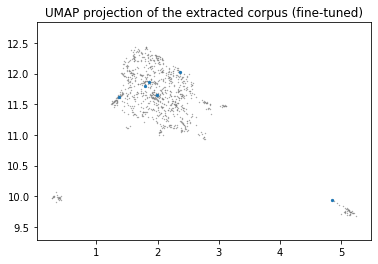

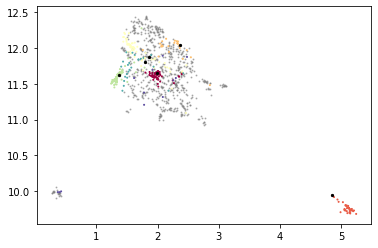

0.052871887


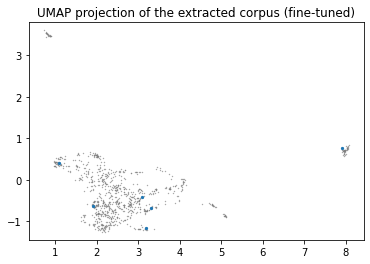

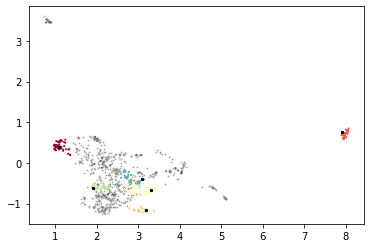

0.08832535


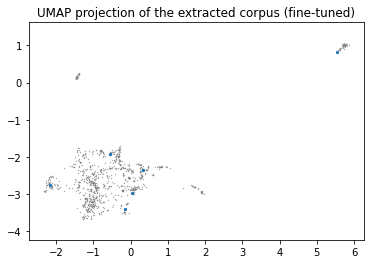

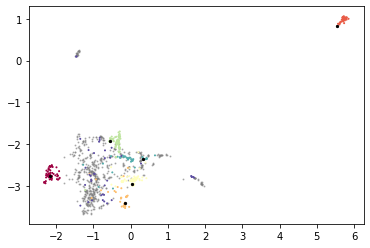

0.112191305


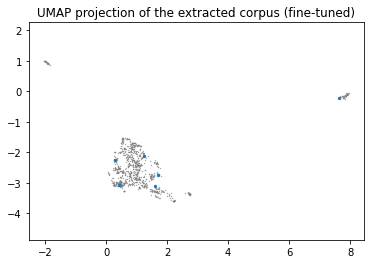

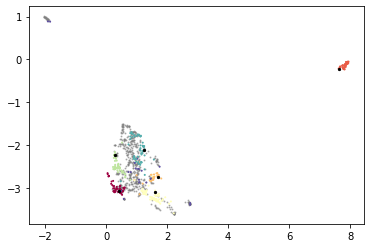

0.112547405


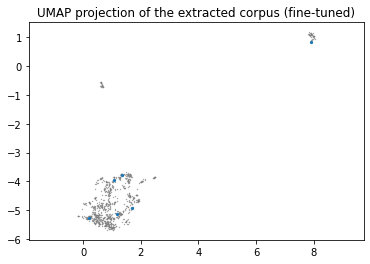

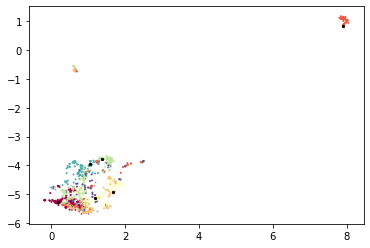

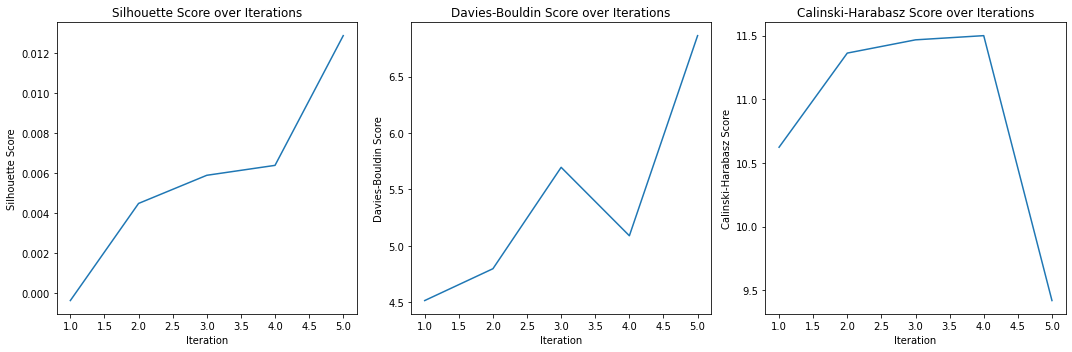

Silhouette : 0.012874254
Davies Bouldin : 6.861954619528747
Calinski Harabasz : 9.418851393072568


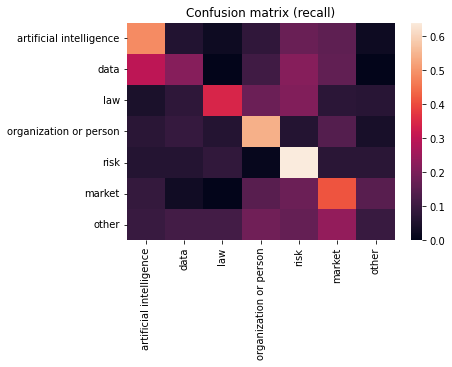

Accuracy : 0.3981841763942931
Precision : 0.4819902981097563
Recall : 0.3981841763942931
f1 : 0.40531610983753585
  Prediction             Ground truth
0     market  artificial intelligence
1       risk                     risk
2      other                    other
3     market                     risk
4       risk                      law


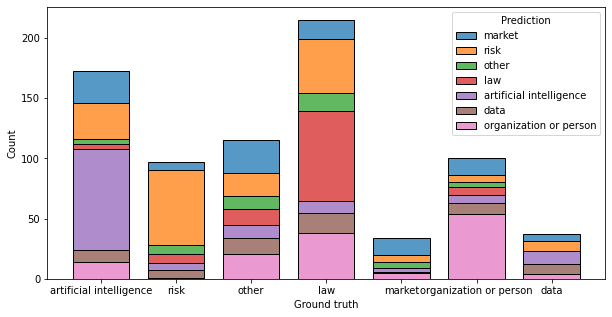

In [7]:
y_pred = model.iterate(X, y, 5, verbose=1)


In [9]:
print(y_pred)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  3  3  3  5  3  3  4  4  4  4
  4  4  2  2  2  2  2  2  2  3  5  5  5  6  0  4  0  4  0 -1  4  4  4  3
  5  1  4  4  1  1  2 -1  5  1  5 -1  3  0  0  4  0  0  5  5  5  4  4 -1
  3  5  5  5  5  3  0  0  6  5  5  5  5  0  4  0  5  3  3  5 -1 -1  0  6
  3  0  0  0  0  0  0  0  3  0 -1  0  3  3  0  0  4  3  5  0  0  0  0  0
  0  0  5  0  0  0  0  0  3  5  0  0  0  6  0  1  1  1  1  1  1  0  0  0
  0  0  0  0  0  1  0  3  4  4 -1  4  1  4  4  0  0  4  4  5  0  4  0  5
  1  0  1  6  0  4  0  5  0  0  0 -1  2  0  1  5  4 -1  4  0  0  1  4  5
  0  0  0  0  0 -1  5  5  0  4  4  0  0  0  0  0  0  4  0  4  1  0  1 -1
  3 -1 -1  0  1  1  5  0  0  1  0  0  2  0  2  0  3 -1  3  3  3  0  4  0
  1  5  4  3  0  5  1  1  3  0  3  1  0  4  1  1  1  4  4  1  6  1  0  0
  4  0  1  1  5  5  1  1  1  1  1  1  4 -1  1  1  3  1  1  4  0  0  0  5
  1  1  1 -1  5  0  5  4  4  2  4  1  4  1  4  4  3  1  4  4  4  0  0  0
  2  2  2  3  3  2  2  4  6  3  6  2  2  6  4  6  2